In [1]:
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt

from tool_box import getT, getPoses
from interpolation import interpolate, remove_anomalies, defect_score, replacement_ratio

# Path to rendu_final
path = "../../code/rendu_final/"

In [3]:
with open(path+'train_names.pickle','rb') as t:
    train_videos = pickle.load(t)

with open(path+'test_names.pickle','rb') as t:
    test_videos = pickle.load(t)

video_name = train_videos[0]
T = getT(path+"json_posesv2/"+video_name)
poses1 = getPoses(T)
y1 = poses1[:,0,0]
# 30 fps
x = np.linspace(0., y1.shape[0] /30., y1.shape[0])

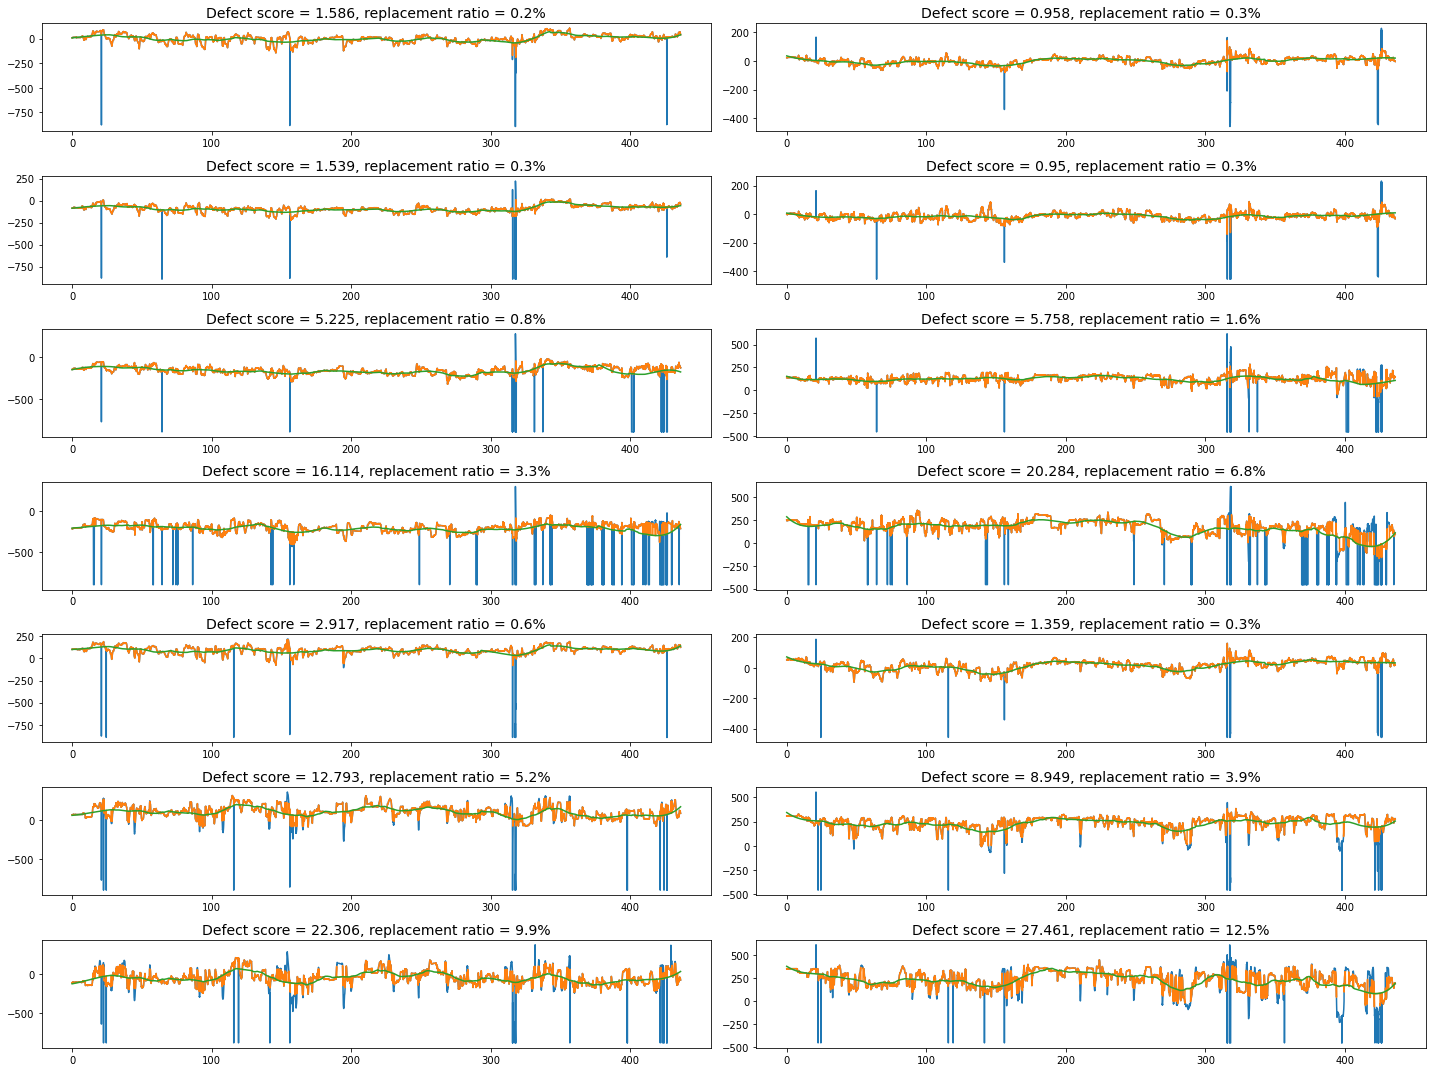

In [4]:
nb_poses = 7
threshold=150
window_length=1501
poly_order=3

def interp_clean(y):
    y_interp = interpolate(y, window_length=window_length, poly_order=poly_order)
    y_clean = remove_anomalies(y, y_interp, threshold)

    return y_interp, y_clean

def plot_poses(nb_poses, figsize=(10,10), interp_clean=interp_clean):
    fig, axs = plt.subplots(nb_poses, 2, figsize=figsize)
    for i in range(nb_poses):
        plot_along_ax(poses1[:,i,0], axs[i, 0], interp_clean)
        plot_along_ax(poses1[:,i,1], axs[i, 1], interp_clean)
    plt.tight_layout()


def plot_along_ax(y, ax, interp_clean):
    y_interp, y_clean = interp_clean(y)

    # y_interp2 = interpolate(y_clean, window_length=window_length, poly_order=poly_order)
    ax.plot(x, y)
    ax.plot(x, y_clean)
    ax.plot(x, y_interp)
    ds = defect_score(y, y_interp, norm="L1", threshold=threshold)
    rep_val = replacement_ratio(y, y_interp, threshold)
    ax.set_title("Defect score = " + str(round(ds, 3)) + ", replacement ratio = "+ str(round(rep_val*100,1)) + "%", fontsize=14) # "quality = " + str(round(q, 3))

plot_poses(nb_poses, figsize=(20,15), interp_clean=interp_clean)


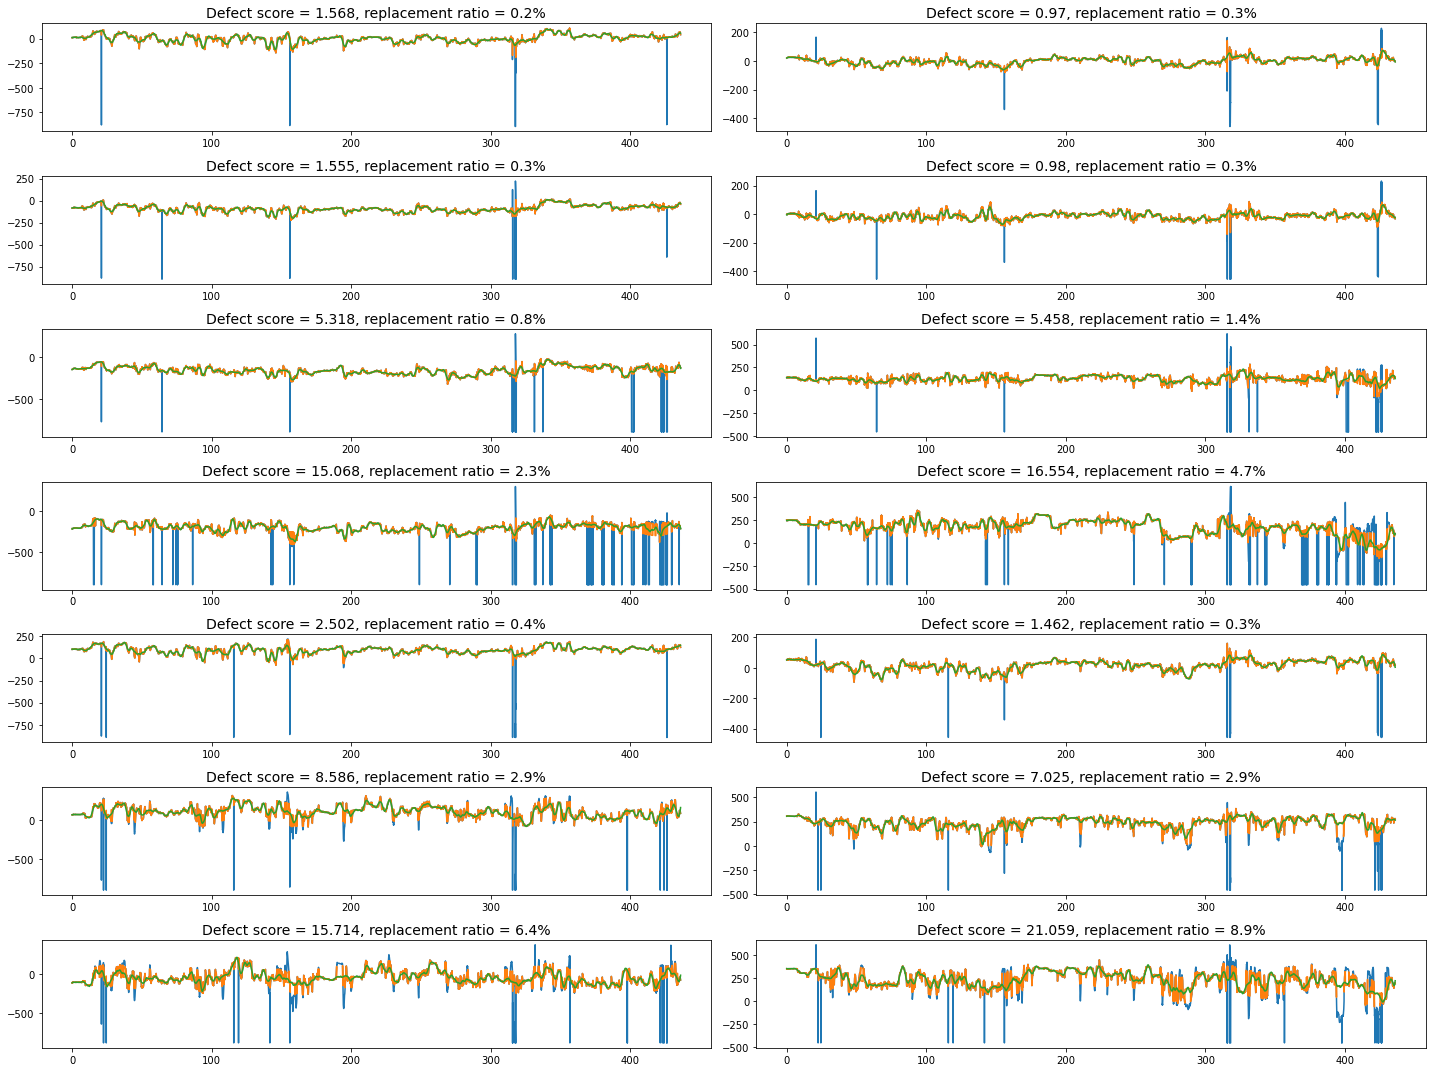

In [5]:
def interp_clean_refine(y):
    y_interp = interpolate(y, window_length=1501, poly_order=3)
    y_clean = remove_anomalies(y, y_interp, threshold)
    y_interp = interpolate(y_clean, window_length=251, poly_order=5)

    return y_interp, y_clean

plot_poses(nb_poses, figsize=(20,15), interp_clean=interp_clean_refine)